/tmp/ipykernel_681/4073367652.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')


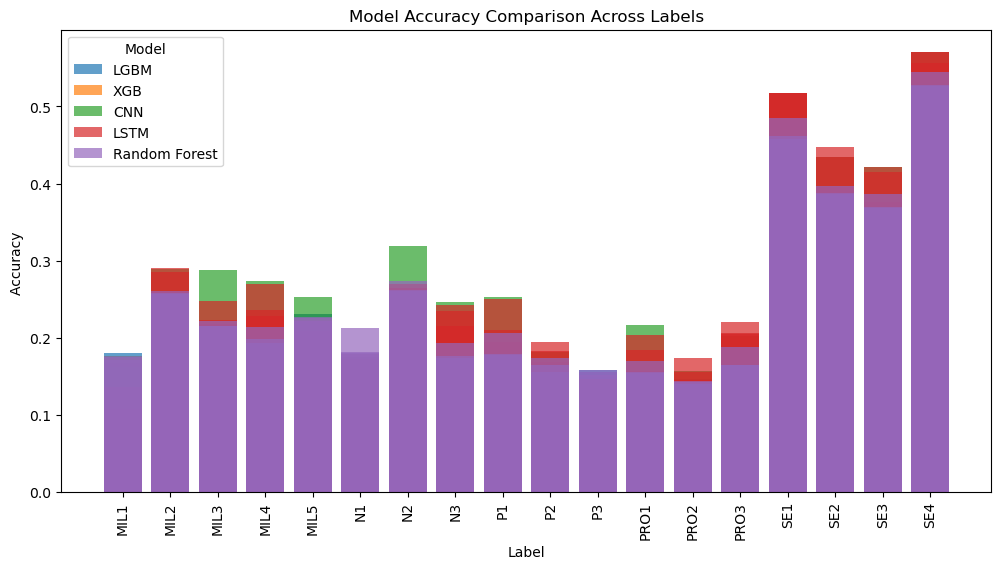

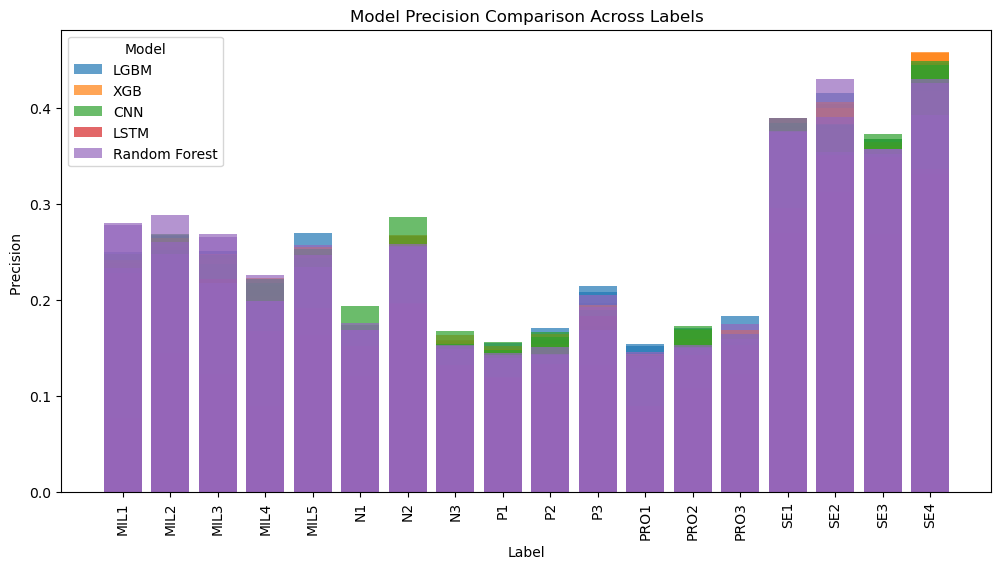

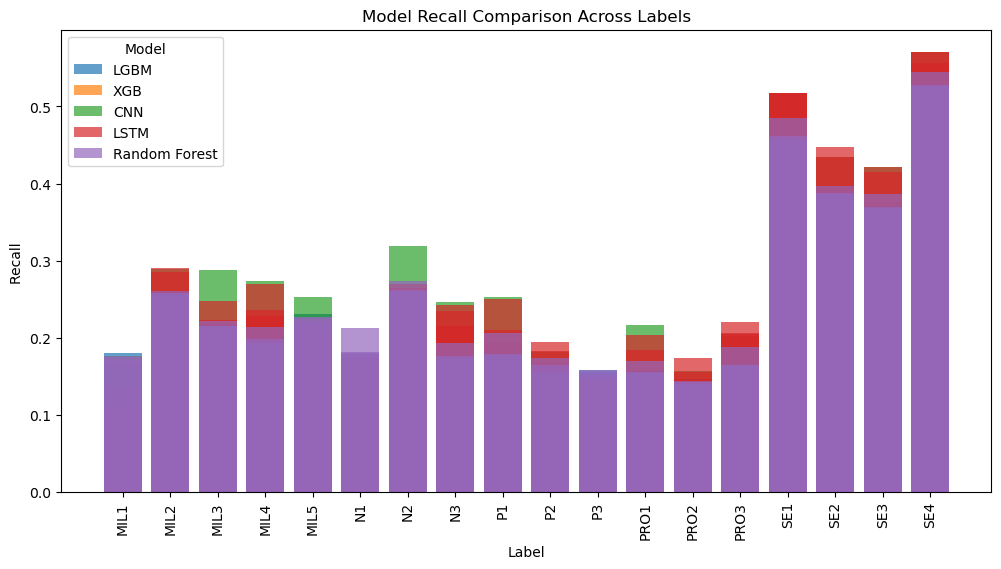

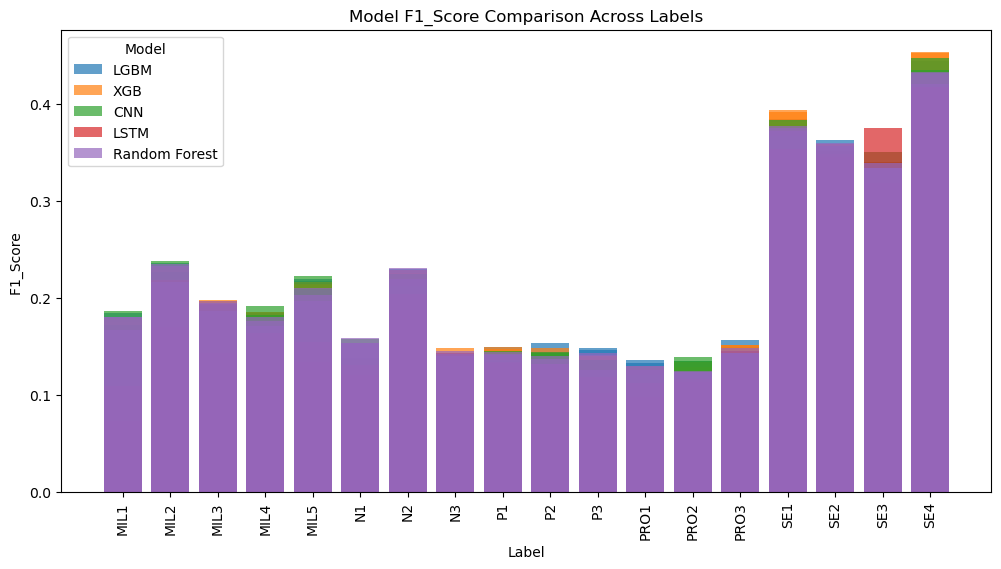

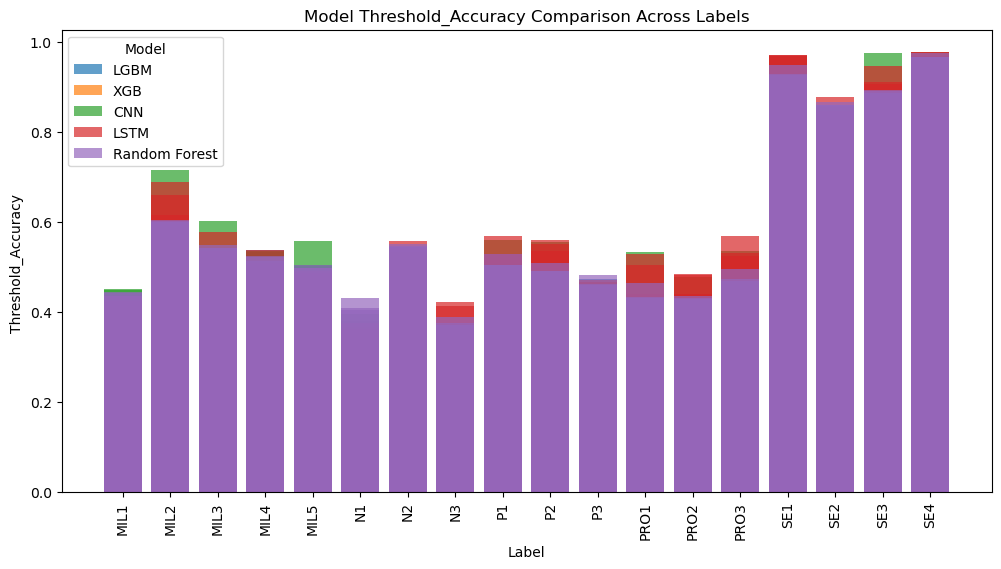

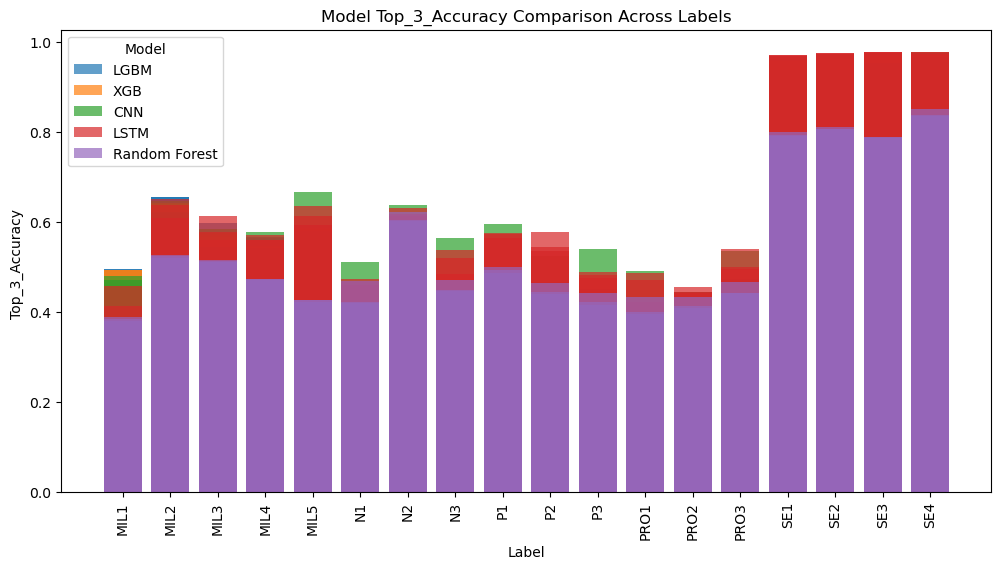

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Combined_model_performance_by_label.csv"
df_raw = pd.read_csv(file_path, skiprows=1)  # Skip the first row since it contains repeated column headers

# Rename columns properly
df_raw.columns = [
    "Label", "Model", "Dataset", "accuracy_mean", "accuracy_std",
    "precision_mean", "precision_std", "recall_mean", "recall_std",
    "f1_score_mean", "f1_score_std", "threshold_accuracy_mean", "threshold_accuracy_std",
    "top_3_accuracy_mean", "top_3_accuracy_std"
]

# Keep only relevant columns
df_cleaned = df_raw[["Label", "Model", "Dataset", "accuracy_mean", "precision_mean", "recall_mean",
                      "f1_score_mean", "threshold_accuracy_mean", "top_3_accuracy_mean"]]

# Convert numerical columns to float
num_cols = ["accuracy_mean", "precision_mean", "recall_mean", "f1_score_mean", "threshold_accuracy_mean", "top_3_accuracy_mean"]
for col in num_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Generate plots for each metric
for metric in num_cols:
    plt.figure(figsize=(12, 6))
    
    for model in df_cleaned["Model"].unique():
        model_data = df_cleaned[df_cleaned["Model"] == model]
        plt.bar(model_data["Label"], model_data[metric], label=model, alpha=0.7)

    plt.xlabel("Label")
    plt.ylabel(metric.replace("_mean", " ").title())
    plt.title(f"Model {metric.replace('_mean', '').title()} Comparison Across Labels")
    plt.xticks(rotation=90)
    plt.legend(title="Model")
    plt.show()
